<a href="https://colab.research.google.com/github/gomescheelsy03/INST-414-0101-/blob/main/IMDb_Movie_Similarity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("IMDB_processed_data.csv")
df.head()

,Rank,Title,Release,Runtime,Rated,Ratings
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3
1,2,The Godfather,1972,2h 55m,R,9.2
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0
3,4,The Godfather Part II,1974,3h 22m,R,9.0
4,5,12 Angry Men,1957,1h 36m,Approved,9.0


In [3]:
# Convert runtime like '2h 22m' into total minutes
def convert_runtime(runtime_str):
    if isinstance(runtime_str, str):
        hours = 0
        minutes = 0
        if 'h' in runtime_str:
            hours = int(runtime_str.split('h')[0])
        if 'm' in runtime_str:
            minutes = int(runtime_str.split('h')[1].replace('m','').strip()) if 'h' in runtime_str else int(runtime_str.replace('m','').strip())
        return hours * 60 + minutes
    else:
        return np.nan  # Handle any missing data

df['RuntimeMinutes'] = df['Runtime'].apply(convert_runtime)
df[['Title', 'Runtime', 'RuntimeMinutes']].head()


,Title,Runtime,RuntimeMinutes
0,The Shawshank Redemption,2h 22m,142
1,The Godfather,2h 55m,175
2,The Dark Knight,2h 32m,152
3,The Godfather Part II,3h 22m,202
4,12 Angry Men,1h 36m,96


In [4]:
df['Release'] = pd.to_numeric(df['Release'], errors='coerce')
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')


In [5]:
rated_dummies = pd.get_dummies(df['Rated'], prefix='Rated')
df = pd.concat([df, rated_dummies], axis=1)
df.head()


,Rank,Title,Release,Runtime,Rated,Ratings,RuntimeMinutes,Rated_Approved,Rated_G,Rated_NC-17,Rated_Not Rated,Rated_PG,Rated_PG-13,Rated_Passed,Rated_R
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3,142,False,False,False,False,False,False,False,True
1,2,The Godfather,1972,2h 55m,R,9.2,175,False,False,False,False,False,False,False,True
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0,152,False,False,False,False,False,True,False,False
3,4,The Godfather Part II,1974,3h 22m,R,9.0,202,False,False,False,False,False,False,False,True
4,5,12 Angry Men,1957,1h 36m,Approved,9.0,96,True,False,False,False,False,False,False,False


In [6]:
scaler = MinMaxScaler()
df[['Release_norm', 'Runtime_norm', 'Ratings_norm']] = scaler.fit_transform(df[['Release', 'RuntimeMinutes', 'Ratings']])
df[['Title', 'Release_norm', 'Runtime_norm', 'Ratings_norm']].head()


,Title,Release_norm,Runtime_norm,Ratings_norm
0,The Shawshank Redemption,0.708738,0.502591,1.000000
1,The Godfather,0.495146,0.673575,0.923077
2,The Dark Knight,0.844660,0.554404,0.769231
3,The Godfather Part II,0.514563,0.813472,0.769231
4,12 Angry Men,0.349515,0.264249,0.769231


In [7]:
feature_cols = ['Release_norm', 'Runtime_norm', 'Ratings_norm'] + list(rated_dummies.columns)
features = df[feature_cols]
features.head()


,Release_norm,Runtime_norm,Ratings_norm,Rated_Approved,Rated_G,Rated_NC-17,Rated_Not Rated,Rated_PG,Rated_PG-13,Rated_Passed,Rated_R
0,0.708738,0.502591,1.000000,False,False,False,False,False,False,False,True
1,0.495146,0.673575,0.923077,False,False,False,False,False,False,False,True
2,0.844660,0.554404,0.769231,False,False,False,False,False,True,False,False
3,0.514563,0.813472,0.769231,False,False,False,False,False,False,False,True
4,0.349515,0.264249,0.769231,True,False,False,False,False,False,False,False


In [8]:
similarity_matrix = cosine_similarity(features)
similarity_df = pd.DataFrame(similarity_matrix, index=df['Title'], columns=df['Title'])
similarity_df.head()


Title,The Shawshank Redemption,The Godfather,The Dark Knight,The Godfather Part II,12 Angry Men,The Lord of the Rings: The Return of the King,Schindler's List,Pulp Fiction,The Lord of the Rings: The Fellowship of the Ring,"The Good, the Bad and the Ugly",...,The Battle of Algiers,Into the Wild,The Grapes of Wrath,Groundhog Day,A Man Escaped,Amores Perros,The Help,Rebecca,A Silent Voice: The Movie,Andhadhun
Title,,,,,,,,,,,,,,,,,,,,,
The Shawshank Redemption,1.000000,0.985505,0.613735,0.965395,0.518669,0.617751,0.976410,0.984492,0.598692,0.957074,...,0.302865,0.827677,0.231701,0.308062,0.294427,0.797238,0.404298,0.232687,0.400524,0.438272
The Godfather,0.985505,1.000000,0.581712,0.991416,0.497450,0.608388,0.985808,0.978483,0.582497,0.984605,...,0.297560,0.818828,0.257218,0.270369,0.286271,0.798005,0.375004,0.258712,0.360430,0.400042
The Dark Knight,0.613735,0.581712,1.000000,0.575973,0.478732,0.988997,0.609104,0.589127,0.994508,0.529811,...,0.344018,0.465267,0.254599,0.370634,0.316730,0.430497,0.903444,0.255730,0.467646,0.499760
The Godfather Part II,0.965395,0.991416,0.575973,1.000000,0.465477,0.616113,0.993714,0.979111,0.588230,0.995482,...,0.327528,0.859456,0.288798,0.299336,0.301526,0.846020,0.411969,0.290658,0.392551,0.429616
12 Angry Men,0.518669,0.497450,0.478732,0.465477,1.000000,0.478170,0.475924,0.458849,0.461702,0.423207,...,0.203452,0.261294,0.836464,0.191644,0.212421,0.226255,0.263403,0.835848,0.260351,0.294386


In [9]:
movie_name = "Inception"
top_10_similar = similarity_df[movie_name].sort_values(ascending=False)[1:11]
top_10_similar


,Inception
Title,
Interstellar,0.996329
Forrest Gump,0.996324
The Dark Knight,0.995936
The Lord of the Rings: The Two Towers,0.993589
The Lord of the Rings: The Fellowship of the Ring,0.992845
Life Is Beautiful,0.991602
The Prestige,0.989467
The Lord of the Rings: The Return of the King,0.984266
Dune: Part Two,0.984099


In [13]:
# Define your three main query movies
query_movies = ["Inception", "The Dark Knight", "Interstellar"]

# Create an empty dictionary to store results
results = {}

# Loop through each movie and get top 10 similar movies
for movie in query_movies:
    if movie in similarity_df.index:
        top_10 = similarity_df[movie].sort_values(ascending=False)[1:11]
        results[movie] = top_10
        print(f"\nTop 10 movies most similar to {movie}:\n")
        print(top_10)
    else:
        print(f"\nMovie '{movie}' not found in dataset.\n")



Top 10 movies most similar to Inception:

Title
Interstellar                                         0.996329
Forrest Gump                                         0.996324
The Dark Knight                                      0.995936
The Lord of the Rings: The Two Towers                0.993589
The Lord of the Rings: The Fellowship of the Ring    0.992845
Life Is Beautiful                                    0.991602
The Prestige                                         0.989467
The Lord of the Rings: The Return of the King        0.984266
Dune: Part Two                                       0.984099
Avengers: Infinity War                               0.978912
Name: Inception, dtype: float64

Top 10 movies most similar to The Dark Knight:

Title
Inception                                            0.995936
Forrest Gump                                         0.995637
The Lord of the Rings: The Fellowship of the Ring    0.994508
The Lord of the Rings: The Two Towers                0.991

In [16]:
# Combine results into one table without droplevel
combined_df = pd.concat(results, axis=1)
combined_df.columns = combined_df.columns.droplevel(0) if isinstance(combined_df.columns, pd.MultiIndex) else combined_df.columns
combined_df


,Inception,The Dark Knight,Interstellar
Title,,,
Interstellar,0.996329,0.987614,NaN
Forrest Gump,0.996324,0.995637,0.989800
The Dark Knight,0.995936,NaN,NaN
The Lord of the Rings: The Two Towers,0.993589,0.991181,0.995592
The Lord of the Rings: The Fellowship of the Ring,0.992845,0.994508,0.991800
Life Is Beautiful,0.991602,0.981335,NaN
The Prestige,0.989467,0.973107,0.990370
The Lord of the Rings: The Return of the King,0.984266,0.988997,NaN
Dune: Part Two,0.984099,0.965685,0.993421


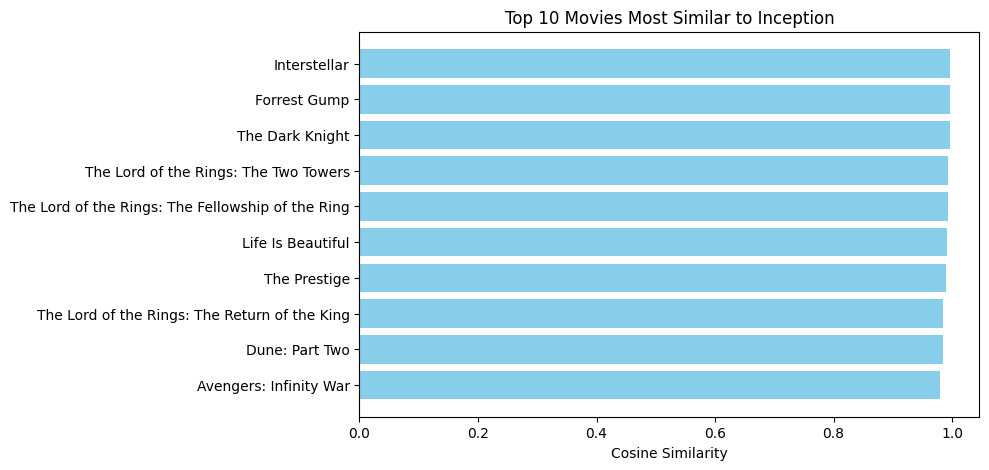

In [15]:
import matplotlib.pyplot as plt

# Choose one example (e.g., Inception)
movie_name = "Inception"
top_10 = similarity_df[movie_name].sort_values(ascending=False)[1:11]

plt.figure(figsize=(8,5))
plt.barh(top_10.index, top_10.values, color="skyblue")
plt.gca().invert_yaxis()
plt.title(f"Top 10 Movies Most Similar to {movie_name}")
plt.xlabel("Cosine Similarity")
plt.show()


In [17]:
def format_top10(movie):
    out = combined_df[[movie]].dropna().reset_index()
    out.columns = ["Similar Movie", "Cosine Similarity"]
    out["Cosine Similarity"] = out["Cosine Similarity"].round(6)
    return out

format_top10("Inception")
format_top10("The Dark Knight")
format_top10("Interstellar")


,Similar Movie,Cosine Similarity
0,Forrest Gump,0.989800
1,The Lord of the Rings: The Two Towers,0.995592
2,The Lord of the Rings: The Fellowship of the Ring,0.991800
3,The Prestige,0.990370
4,Dune: Part Two,0.993421
5,Avengers: Infinity War,0.987629
6,Inception,0.996329
7,The Dark Knight Rises,0.990123
8,3 Idiots,0.989955
9,Avengers: Endgame,0.988148


In [18]:
# Round for nicer display
combined_pretty = combined_df.copy()
combined_pretty = combined_pretty.applymap(lambda x: round(x, 6) if pd.notnull(x) else x)

# Save the combined table
combined_pretty.to_csv("top10_combined.csv")

# Also save one CSV per query movie (nice for Medium screenshots)
for col in combined_pretty.columns:
    out = combined_pretty[[col]].dropna().reset_index().rename(columns={"index":"Similar Movie", col:"Similarity"})
    out.to_csv(f"top10_{col.replace(' ','_')}.csv", index=False)


/tmp/ipython-input-1934357591.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_pretty = combined_pretty.applymap(lambda x: round(x, 6) if pd.notnull(x) else x)
